### Imports

In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

### Calculate Association Rules

In [2]:
df_train = pd.read_csv("dataset/04-preprocessed/train.csv")
df_test = pd.read_csv("dataset/04-preprocessed/test.csv")
df = pd.concat([df_train, df_test], axis=0)

# make classification_final as 2 is the value is 1 or 2 or 3 else 1
df["CLASIFFICATION_FINAL"] = df["CLASIFFICATION_FINAL"].apply(lambda x: 2 if x in [1, 2, 3] else 1)

df.drop(["AGE", "MEDICAL_UNIT"], axis=1, inplace=True)

columns = df.columns

# create transactional data , if the value is 2 then the item is present in the transaction else not
for column in columns:
    df[column] = df[column].apply(lambda x: column if x == 2 else 0)

# Convert the dataframe into a list of lists
records = df.values.tolist()

new_records = []
for record in records:
    new_records.append(list(filter(lambda a: a != 0, record)))

records = new_records

# Convert all values to string
records = [[str(item) for item in record] for record in records]

# Initialize TransactionEncoder
te = TransactionEncoder()

# Transform the data into an array
te_ary = te.fit(records).transform(records)

# Convert the array into a dataframe
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)

# Generate Association Rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)


In [3]:
sorted_by_support = frequent_itemsets.sort_values(by="support", ascending=False)
print(sorted_by_support.head(10).to_string())

     support                   itemsets
5   0.989322                  (INMSUPR)
2   0.986751                     (COPD)
9   0.981214            (RENAL_CHRONIC)
1   0.978643           (CARDIOVASCULAR)
35  0.977259            (INMSUPR, COPD)
60  0.972118   (INMSUPR, RENAL_CHRONIC)
7   0.971327            (OTHER_DISEASE)
26  0.970338  (INMSUPR, CARDIOVASCULAR)
39  0.969349      (RENAL_CHRONIC, COPD)
0   0.969349                   (ASTHMA)


In [4]:
sorted_by_confidence = rules.sort_values(by="confidence", ascending=False)
print(sorted_by_confidence.head(10).to_string(index=False))

                                                                                                         antecedents consequents  antecedent support  consequent support  support  confidence     lift  leverage  conviction  zhangs_metric
                              (TOBACCO, CARDIOVASCULAR, INMSUPR, DIABETES, ASTHMA, OBESITY, HIPERTENSION, PNEUMONIA)      (COPD)            0.559423            0.986751 0.558038    0.997526 1.010919  0.006028    5.354473       0.024516
               (TOBACCO, CARDIOVASCULAR, RENAL_CHRONIC, INMSUPR, ASTHMA, DIABETES, OBESITY, HIPERTENSION, PNEUMONIA)      (COPD)            0.557445            0.986751 0.556061    0.997517 1.010910  0.006001    5.335546       0.024387
                               (OTHER_DISEASE, TOBACCO, INMSUPR, DIABETES, ASTHMA, OBESITY, HIPERTENSION, PNEUMONIA)      (COPD)            0.552897            0.986751 0.551513    0.997496 1.010890  0.005941    5.292014       0.024094
                (OTHER_DISEASE, TOBACCO, RENAL_CHRONIC, 

In [5]:
sorted_by_lift = rules.sort_values(by="lift", ascending=False)
print(sorted_by_lift.head(10).to_string(index=False))

                                                                     antecedents                                                                      consequents  antecedent support  consequent support  support  confidence     lift  leverage  conviction  zhangs_metric
         (OTHER_DISEASE, CARDIOVASCULAR, RENAL_CHRONIC, DIABETES, OBESITY, COPD)                              (TOBACCO, INMSUPR, ASTHMA, HIPERTENSION, PNEUMONIA)            0.720190            0.664821 0.546767    0.759198 1.141959  0.067970    1.391929       0.444271
                             (TOBACCO, INMSUPR, ASTHMA, HIPERTENSION, PNEUMONIA)          (OTHER_DISEASE, CARDIOVASCULAR, RENAL_CHRONIC, DIABETES, OBESITY, COPD)            0.664821            0.720190 0.546767    0.822427 1.141959  0.067970    1.575748       0.370881
             (TOBACCO, CARDIOVASCULAR, INMSUPR, ASTHMA, HIPERTENSION, PNEUMONIA)                          (OTHER_DISEASE, RENAL_CHRONIC, DIABETES, OBESITY, COPD)            0.660075            

In [6]:
sorted_by_leverage = rules.sort_values(by="leverage", ascending=False)
print(sorted_by_leverage.head(10).to_string(index=False))

                                                            antecedents                                                             consequents  antecedent support  consequent support  support  confidence     lift  leverage  conviction  zhangs_metric
(OTHER_DISEASE, CARDIOVASCULAR, RENAL_CHRONIC, DIABETES, OBESITY, COPD)                             (INMSUPR, TOBACCO, HIPERTENSION, PNEUMONIA)            0.720190            0.686178 0.562389    0.780890 1.138028  0.068211    1.432257       0.433463
                            (INMSUPR, TOBACCO, HIPERTENSION, PNEUMONIA) (OTHER_DISEASE, CARDIOVASCULAR, RENAL_CHRONIC, DIABETES, OBESITY, COPD)            0.686178            0.720190 0.562389    0.819597 1.138028  0.068211    1.551024       0.386484
(OTHER_DISEASE, CARDIOVASCULAR, RENAL_CHRONIC, DIABETES, OBESITY, COPD)                     (TOBACCO, INMSUPR, ASTHMA, HIPERTENSION, PNEUMONIA)            0.720190            0.664821 0.546767    0.759198 1.141959  0.067970    1.391929       0.444

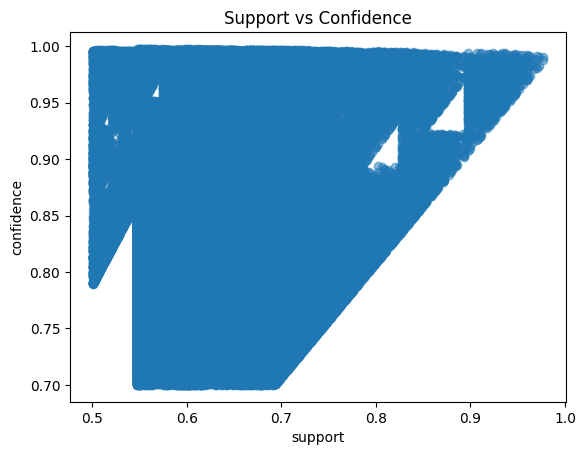

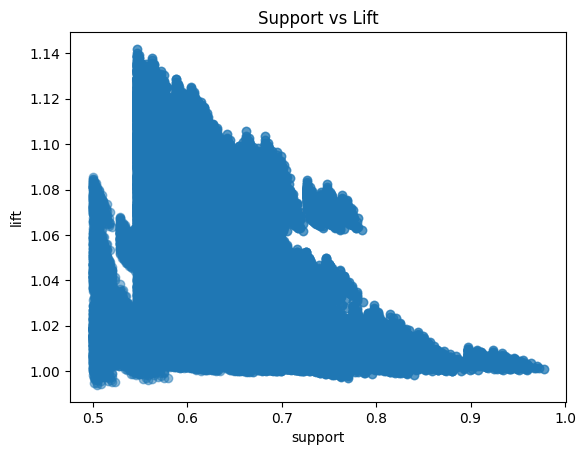

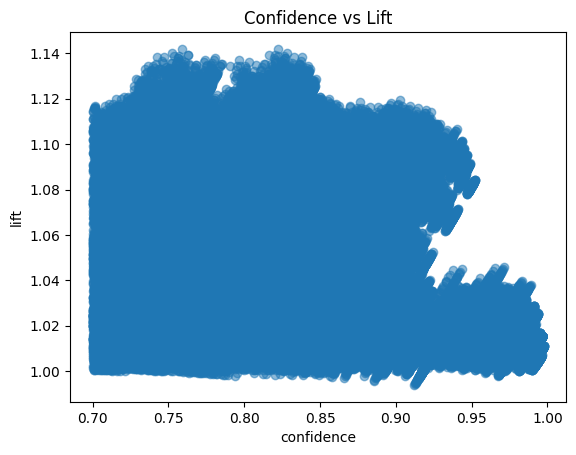

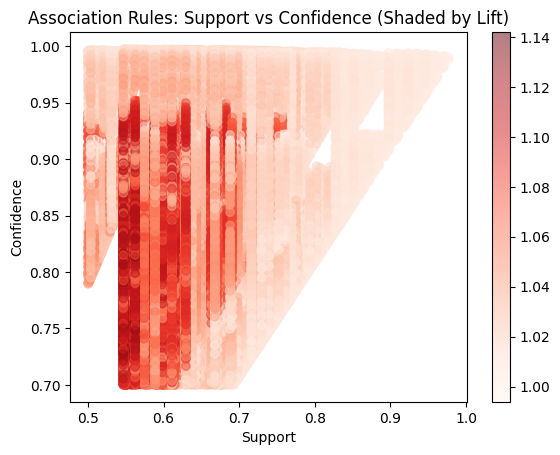

In [7]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Plot support vs. confidence
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

# Plot support vs. lift
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

# Plot confidence vs. lift
plt.scatter(rules['confidence'], rules['lift'], alpha=0.5)
plt.xlabel('confidence')
plt.ylabel('lift')
plt.title('Confidence vs Lift')
plt.show()

# Plot support vs. confidence with shading as lift
plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], cmap='Reds', alpha=0.5)
plt.colorbar()
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence (Shaded by Lift)')
plt.show()
